In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()


In [3]:

cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')


In [4]:

cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:

    sample_data = [
        ('Apple', 10, 0.5),
        ('Banana', 20, 0.3),
        ('Orange', 15, 0.7),
        ('Apple', 5, 0.5),
        ('Banana', 10, 0.3)
    ]
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()


In [5]:

query = '''
    SELECT product,
           SUM(quantity) AS total_qty,
           SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product
'''

df = pd.read_sql_query(query, conn)


In [6]:
print("Sales Summary:\n")
print(df)


Sales Summary:

  product  total_qty  revenue
0   Apple         15      7.5
1  Banana         30      9.0
2  Orange         15     10.5


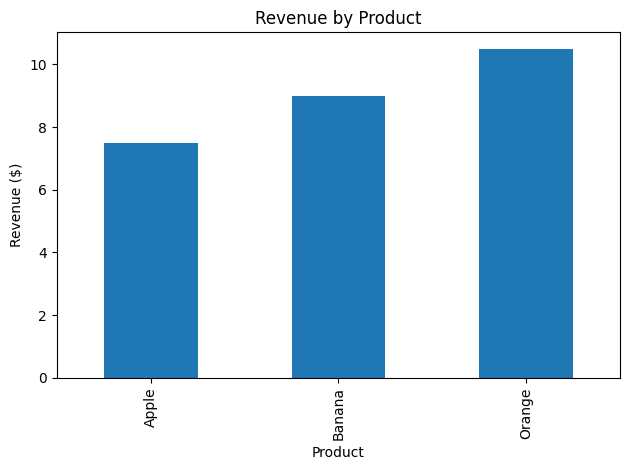

In [7]:

df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title('Revenue by Product')
plt.ylabel('Revenue ($)')
plt.xlabel('Product')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


In [8]:
conn.close()
